# <font color='darkred'>**TMBD Movies**</font>

## **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

> This dataset comes from IMDB and contains information about 10,000 movies,
short films and tv series collected from The Movie Database (TMDb), including user ratings, revenue, runtime and budget.

## **Generate Questions**

In this project, i'll be answering the following questions:
- What's the genre with the highest median popularity?
- What's the genre with the highest median revenue?
- What's the genre with the highest median vote_count?
- What's the genre with the highest mean vote_average?
- what movie genre is considered the "best"?
- What month is considered "best" for releasing a films?
- What is the relationship between the columns and each other?

## **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## **Data Wrangling**


### General Properties

In [14]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
DATA_PATH = "../tmdb-movies.csv"
df = pd.read_csv(DATA_PATH)
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## **Data Cleaning**

In [15]:
# create a function to find and display NANs

def show_nans(df):                                                                    
    missing = df.isnull().sum()                                                       
    missing_pct = (missing / len(df) * 100).round(2)                                  
    return pd.DataFrame({'missing': missing, '%': missing_pct}).query('missing > 0').sort_values('%', ascending=False)

show_nans(df)

,missing,%
homepage,7930,72.98
tagline,2824,25.99
keywords,1493,13.74
production_companies,1030,9.48
cast,76,0.70
director,44,0.40
genres,23,0.21
imdb_id,10,0.09
overview,4,0.04


In [16]:
# drop rows without genres (only 23) and drop columns we don't need                   
df.dropna(subset=['genres'], inplace=True)

In [17]:
# explode genres so each genre gets its own row                                       
df['genres'] = df['genres'].str.split('|')                                            
df_exploded = df.explode('genres') 

In [18]:
print(f"Original rows: {len(df)} | Exploded rows: {len(df_exploded)}")
print(f"Unique genres: {df_exploded['genres'].nunique()}")
df_exploded['genres'].value_counts()

Original rows: 10843 | Exploded rows: 26960
Unique genres: 20


genres
Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: count, dtype: int64

<a id='eda'></a>
## **Exploratory Data Analysis**

### What's the genre with the highest median popularity?

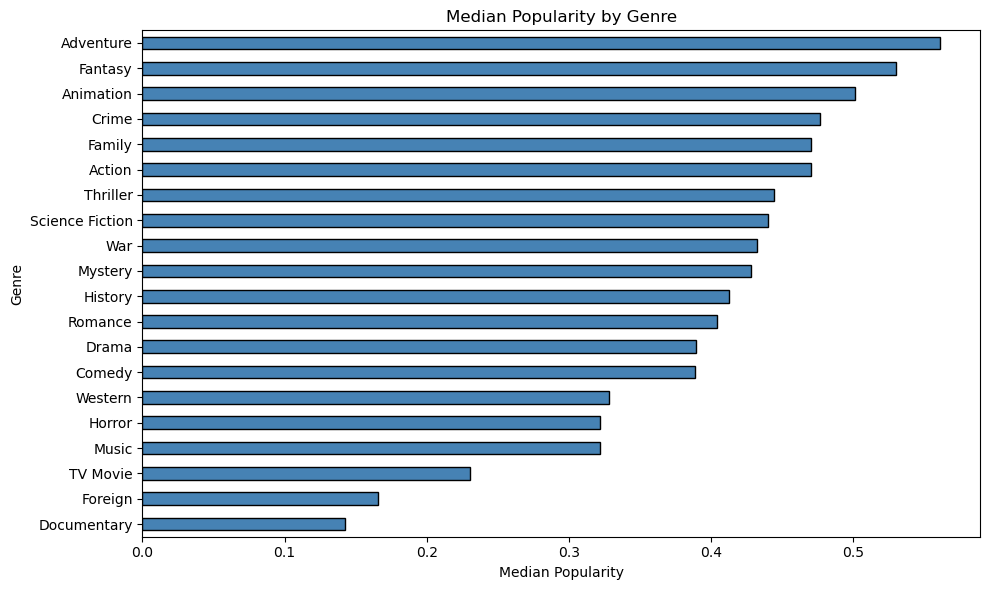

Highest: Adventure (0.56)


In [21]:
pop = df_exploded.groupby('genres')['popularity'].median().sort_values()                                                                                             
pop.plot(kind='barh', figsize=(10, 6), color='steelblue', edgecolor='black')          
plt.title('Median Popularity by Genre')                                               
plt.xlabel('Median Popularity')                                                     
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print(f"Highest: {pop.idxmax()} ({pop.max():.2f})")

### What's the genre with the highest median revenue?

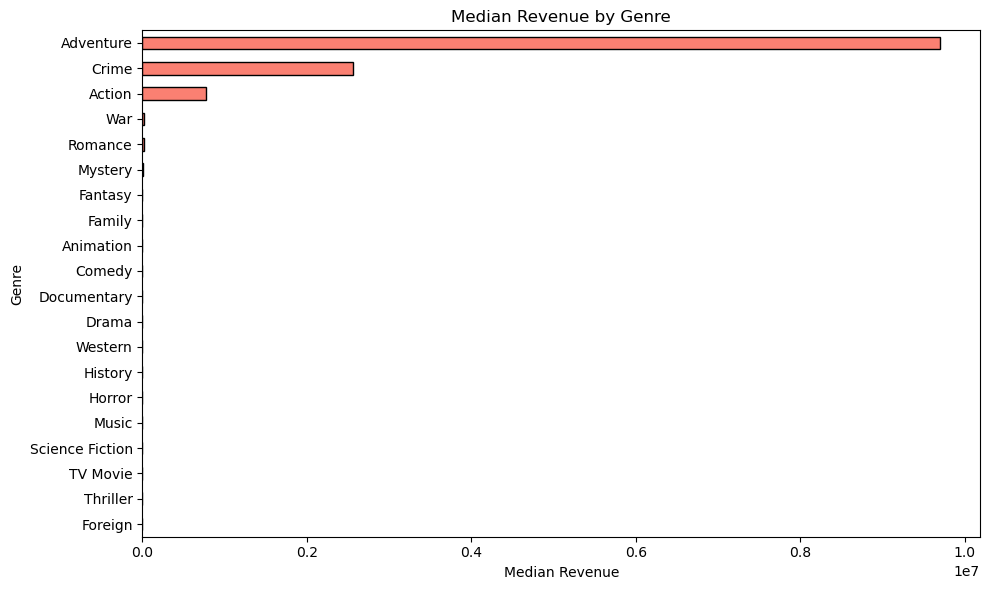

Highest: Adventure ($9,697,739)


In [23]:
rev = df_exploded.groupby('genres')['revenue'].median().sort_values()

rev.plot(kind='barh', figsize=(10, 6), color='salmon', edgecolor='black')             
plt.title('Median Revenue by Genre')
plt.xlabel('Median Revenue')                                                          
plt.ylabel('Genre')                                                                 
plt.tight_layout()
plt.show()

print(f"Highest: {rev.idxmax()} (${rev.max():,.0f})")

### What's the genre with the highest median vote_count?

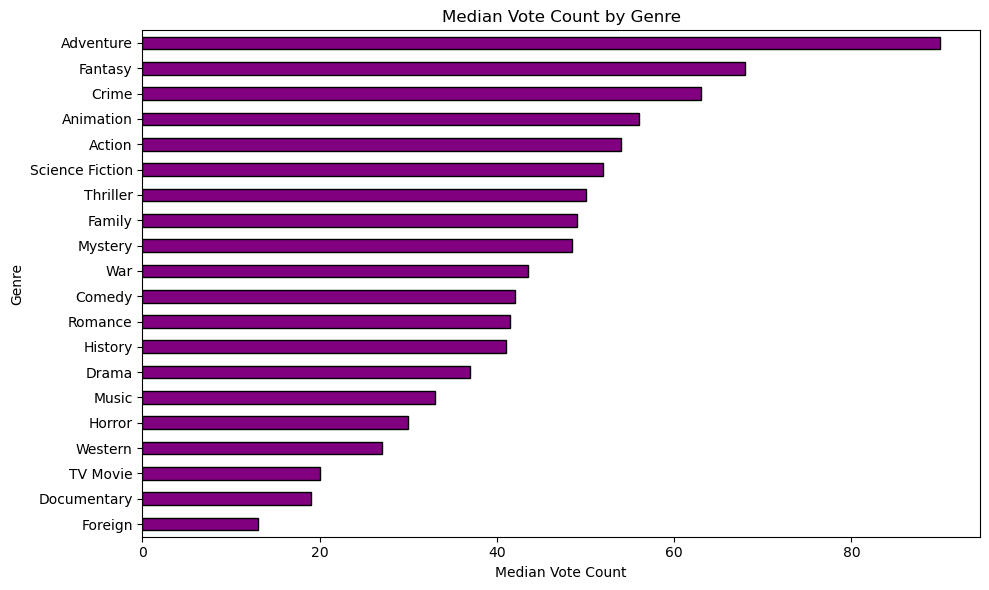

Highest: Adventure (90)


In [25]:
votes = df_exploded.groupby('genres')['vote_count'].median().sort_values()

votes.plot(kind='barh', figsize=(10, 6), color='purple', edgecolor='black')
plt.title('Median Vote Count by Genre')
plt.xlabel('Median Vote Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print(f"Highest: {votes.idxmax()} ({votes.max():.0f})")

### What's the genre with the highest mean vote_average?

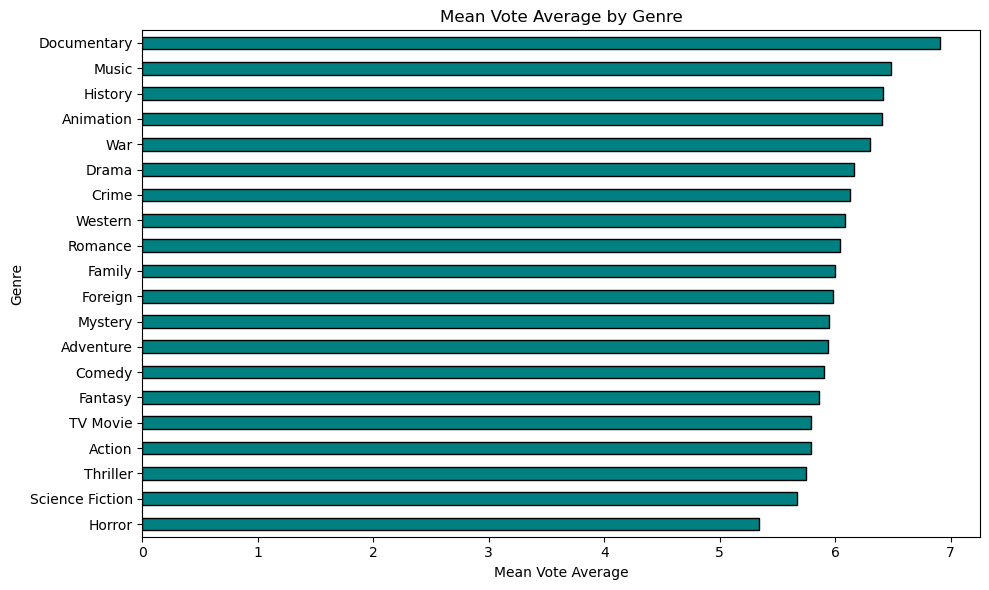

Highest: Documentary (6.91)


In [27]:
avg = df_exploded.groupby('genres')['vote_average'].mean().sort_values()

avg.plot(kind='barh', figsize=(10, 6), color='teal', edgecolor='black')
plt.title('Mean Vote Average by Genre')
plt.xlabel('Mean Vote Average')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

print(f"Highest: {avg.idxmax()} ({avg.max():.2f})")

### What movie is considered movie genre is considered the "best"?


In [28]:
# rank each genre across all metrics (lower rank = better)
ranks = pd.DataFrame({
    'popularity': pop.rank(ascending=False),
    'revenue': rev.rank(ascending=False),
    'vote_count': votes.rank(ascending=False),
    'vote_average': avg.rank(ascending=False)
})
ranks['avg_rank'] = ranks.mean(axis=1)
ranks = ranks.sort_values('avg_rank')

print(ranks)
print(f"\nBest overall genre: {ranks.index[0]}")

  

                 popularity  revenue  vote_count  vote_average  avg_rank
genres                                                                  
Adventure               1.0      1.0         1.0          13.0      4.00
Crime                   4.0      2.0         3.0           7.0      4.00
Animation               3.0     14.0         4.0           4.0      6.25
Fantasy                 2.0      7.0         2.0          15.0      6.50
War                     9.0      4.0        10.0           5.0      7.00
Action                  6.0      3.0         5.0          17.0      7.75
Family                  5.0     14.0         8.0          10.0      9.25
Mystery                10.0      6.0         9.0          12.0      9.25
Romance                12.0      5.0        12.0           9.0      9.50
History                11.0     14.0        13.0           3.0     10.25
Thriller                7.0     14.0         7.0          18.0     11.50
Drama                  13.0     14.0        14.0   

### What month is considered "best" for releasing a films/shows?


/var/folders/gn/zvx5kxqj5ng9ng0cg5f15yk80000gn/T/ipykernel_62046/1781192451.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


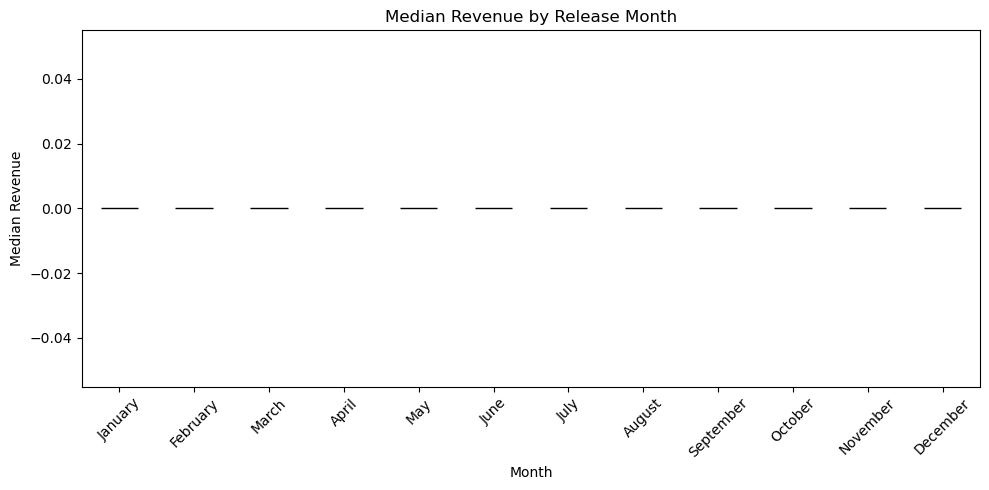

Best month: January ($0)


In [29]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']

monthly_rev = df.groupby('release_month')['revenue'].median().reindex(month_order)

monthly_rev.plot(kind='bar', figsize=(10, 5), color='orange', edgecolor='black')
plt.title('Median Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Median Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Best month: {monthly_rev.idxmax()} (${monthly_rev.max():,.0f})")